In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import math

# Trabajo Práctico Semanal 1 2C25 - Regresión Lineal
## Amalia Ochoa 107129

---

(a) Simulación
1. Utilizando  random.uniform (numpy), generar un dataset de 500 pares de muestras $(X, Y )$ de la siguiente
forma: $X ∼ U(−1, 1)$, $Y |X = x ∼ N (r(x), σ^2 )$ con $σ^2 = 0.04$ y $r(x) = x, 1{x > 0}$ (función conocida
como ReLU).
2. Graficar los datos utilizando scatter (matplotlib).

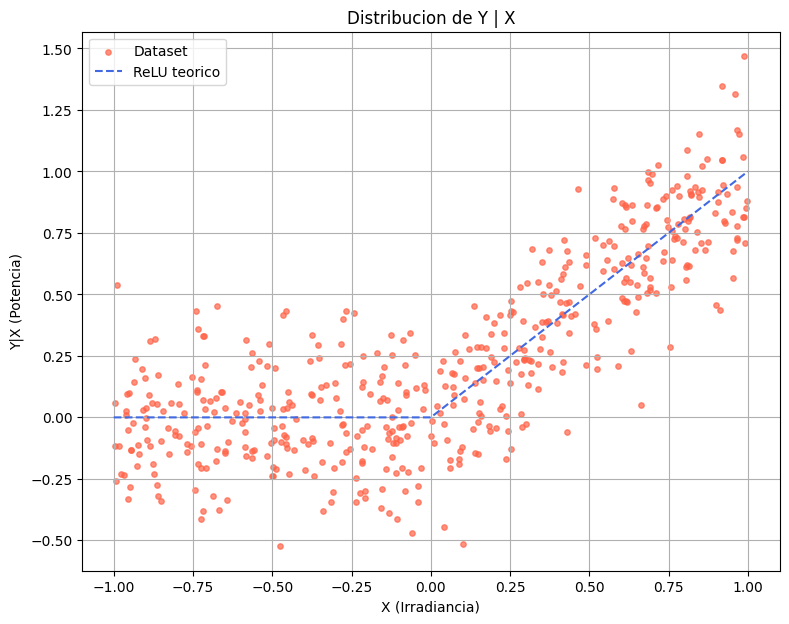

In [2]:
#defino x distribucion uniforme ente -1 y 1
x = np.random.uniform(-1, 1, 500)
sigma = 0.04  #sigma = var
var = (sigma)**0.5
#defino r_x funcion ReLU en base a x, si el valor es menor a cero la llevo a cero
r_x = np.maximum(0,x)

y_dado_x = np.random.normal(r_x, var)

#r_x para el plot
r_x_plot = np.linspace(-1, 1, 500)

#grafico usando scatter
plt.figure(figsize=(9,7))
plt.grid()
plt.scatter(x, y_dado_x, color = 'tomato', s=15, alpha=0.7, label ="Dataset")
plt.plot(r_x_plot, np.maximum(0, r_x_plot), color = 'royalblue', label = "ReLU teorico", linestyle='--')
plt.title('Distribucion de Y | X')
plt.xlabel('X (Irradiancia)')
plt.ylabel('Y|X (Potencia)')
plt.legend()
plt.show()
# a priori parece tener el comportamiento __/ que busco, osea gausianas al rededor del __/
#media en rx y nada mas lejos que 3sigma = 3 * 0.2 = 0.6 para el caso de rx = 0


(b) Análisis Teórico

1. Calcular analíticamente $E[X]$, $E[Y]$, $var(X)$, $var(Y)$ y $E[XY]$. No es necesario ni deseable resolver
integrales con respecto a “y” para computar estas magnitudes.
2. Indicar la función de regresión óptima y el error bayesaino asociado.
3. ¿Cuál es el mejor predictor sin observar X? Comparar el error esperado que comete en comparación
con el regresor óptimo.


La mayoría de los cálculos se realizan utilizando las propiedades 1.7 del apunte Taller de Señales. Dado:

-  $X ∼  U(-1, 1)$
-  $r(X) = ReLU(X)$
-  $σ^2 = 0.04$
-  $Y | X = x ∼ N( r(x), σ^2 )$

Se pide calcular:

- $E[X]$
- $E[Y]$
- $Var(X)$
- $Var(Y)$
- $E[XY]$

---
### $E[X]$, $Var(X)$

Dado que  $X ∼ U(-1, 1)$, se tiene:

$E[X] = 0$,

$Var(X) = (1 - (-1))^2/12 = 4/12 = 0.33$

---
### $E[Y]$, $Var(Y)$

$E[Y] = E[ E[Y | X] ] = E[r(X)]$


Como $r(X) = ReLU(X)$, planteo la integral de 0 a 1, que es cuando da distinta de cero


$E[r(X)] = ∫_0^1 x/2 dx = \frac{1}{2} \frac{x^2}{2} \big|_0^1 = 1/2 ⋅ 1/2 = 1/4$


Entonces,

$E[Y] = 0.25$

---

### $Var(Y)$


$Var(Y) = E [ Var(Y | X)] + Var( E [Y | X] )$

dado que,

- $Var(Y | X) = σ^2 = 0.04$
- $E [ Y | X] = r(X)$

reemplazo y queda:

$Var(Y) = E[ 0.04 ] + Var ( r(X) )$

se calcula entonces $Var(r(X))$:

$Var(r(X)) =  E[r(X)^2] - E[r(X)]^2$ =

= $∫_0^1 \frac{x^2}{2} dx - \frac{1}{16} = \frac{1}{2} \frac{x^3}{3} - \frac{1}{16} = \frac{1}{6} - \frac{1}{16} = \frac{5}{48} ≈ 0,104$

Entonces,

$Var(Y) = \frac{1}{25} + \frac{5}{48} = \frac{173}{1200} ≈ 0,144$

---

### E[XY]

$E[XY] = E[E[Y|X] r(X)] = E[r(X) * r(X)] = Var(r(X)) = \frac{1}{6} ≈ 0.167$

---

### Resultados

| Magnitud           | Valor simbólico                   | Valor decimal aprox. |
|--------------------|-----------------------------------|-----------------------|
| E[X]     | 0                                 | 0                     |
| Var(X)    | 1/3                | ≈ 0.333               |
| E[Y]      | 1/4                | 0.25                  |
| Var(Y)     |173/1200        | ≈ 0,144              |
| E[XY]    |  1/6              | ≈ 0.167             |


###Funcion de Regrsión óptima


La funcion de regresión optima es la que minimia el error cuadrático medio, que se puede de la siguiente manera, siengo g(X) la funcion que minimiza el error cuadrático medio:

$E[(Y - g(xX))^2] = E[(Y - E[Y|X] + E[Y|X] - g(X))^2]$
$E[(Y - g(xX))^2] = E[(Y - E[Y|X])^2] + E[(E[Y|X] - g(X))^2] + 2E[(Y-E[Y|X])(E[Y|X] - g(X))]$

Si se desarrolla el primer término queda,

$E[(Y - E[Y|X])^2] = E[E[(Y - E[Y|X])^2|X]] = E[var(Y|X)] = σ^2$, en este caso

El segundo término se puede acotar como

$E[(E[Y|X] - g(X))^2] ≥ 0$

El tercer término se anula usando propiedades de la esperanza condicional:

$E[(Y-E[Y|X])(E[Y|X] - g(X))] = E[E[(Y-E[Y|X]|X])(E[Y|X] - g(X))] = 0$

y si $g(X) = E[Y|X=x]$,

$E[(Y - E[Y|X])^2] > E[var(Y|X)]$

Entonces, el predictor óptimo es la recta de regrsión. El mejor predictor sin observar X es $E[Y]$

El error bayesiano asociado es E[var(Y|X)], es el minimo error posible asociado a la solución óptima. Es el mínimo error que se puede lograr.

El error observado es 0.061293075076554224 > E[var(Y|X)] = 0.04 asi que es consistente al analisis


(c) Regresión Lineal:
1. Implementar una regresión lineal (matricial) a partir de los datos generados previamente. El código
debe estar estructurado de la siguiente manera:
class RegLineal:
Opcional, para inicializar atributos o declarar hiperparámetros
def __init__(self,...
Etapa de entrenamiento
def fit(self,X,y):
Etapa de testeo
def predict(self,X):
#Cómputo del error
def err_predict(self,X,y):
A su vez, se debe poder extraer el atributo RegLineal.params (parámetros encontrados durante el
entrenamiento).
2. Entrenar la regresión lineal con el dataset generado anteriormente.
3. Indicar el error de entrenamiento.
4. Utilizar el regresor para predecir la potencia producida para una irradiancia de 0.5.
5. Graficar el regresor obtenido superpuesto al óptimo y al scatter.

Parámetros (ordenada, pendiente): [0.23370834 0.5127852 ]
Error entrenamiento: {'mse': np.float64(0.061293075076554224), 'rmse': np.float64(0.24757438291663825)}
Predicción en x=0.5: 0.4901009440150803


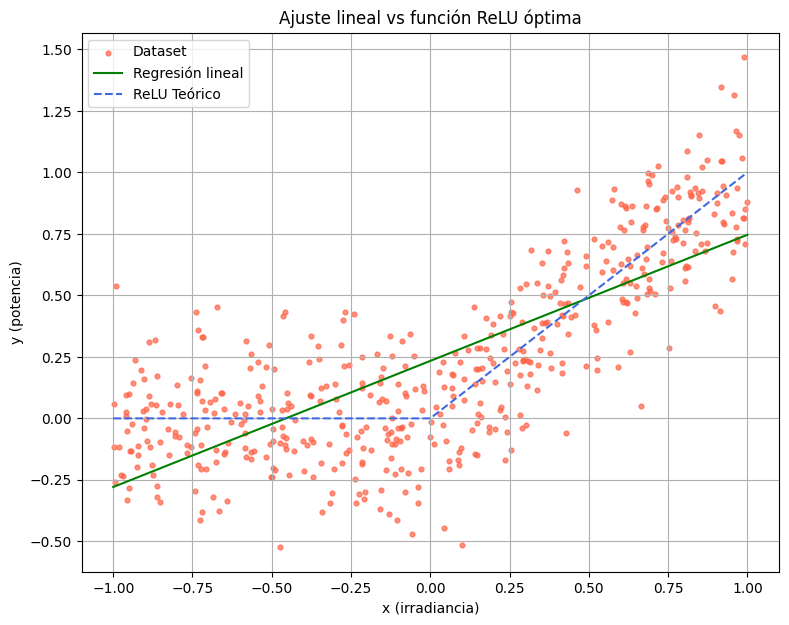

In [19]:
#del ejemplo 2.2 del apunte
class RegLineal:
    def _init_(self):
      self.params = None

    def _design_matriz(self, X):
        X = np.array(X)
        if X.ndim == 1:
            X = X.reshape(-1, 1)
        #creo una fila de unos
        ones = np.ones((X.shape[0], 1))
        return np.hstack([ones, X])

    #entrenamiento
    def fit(self, X, y):
        Xd = self._design_matriz(X)
        # quiero calcular (X_transpuesta * T)^-1 * X_transpuesta * y
        self.params = np.linalg.pinv(Xd.T @ Xd) @ Xd.T @ np.array(y)
        # le asigna los parametros (b,w) a .params
        return self

    #testeo
    def predict(self, X):
        Xd = self._design_matriz(X)
        #del ejemplo 2.2, predict = b + w*X
        #Xd ser [1 X]
        return Xd @ self.params


    #calculo del error - ver apunte taller
    def err_predict(self, X, y):
        y_hat = self.predict(X)
        mse = np.mean((np.array(y) - y_hat)**2)
        mse = mse.astype(float)
        return {'mse': mse, 'rmse': np.sqrt(mse)}


reg = RegLineal()
reg.fit(x, y_dado_x)

print("Parámetros (ordenada, pendiente):", reg.params)
print("Error entrenamiento:", reg.err_predict(x, y_dado_x))
print("Predicción en x=0.5:", reg.predict([0.5])[0])

# grafico
plt.figure(figsize=(9,7))
plt.grid()
plt.scatter(x, y_dado_x, s=12, alpha=0.7, color='Tomato', label='Dataset')
x_line = np.linspace(-1, 1, 300)
plt.plot(x_line, reg.predict(x_line), label='Regresión lineal', color="green")
#da una regresion conforme a lo que vimos en la teórica que deberia pasar.
plt.plot(x_line, np.maximum(0, x_line), label='ReLU Teórico', linestyle='--', color="royalblue")
plt.xlabel('x (irradiancia)')
plt.ylabel('y (potencia)')
plt.title('Ajuste lineal vs función ReLU óptima')
plt.legend()
plt.show()



(d) Gradiente Descendente:
1. Agregar un método fit_gradient(self,X,y,learning_rate) a la implementación desarrollada an-
teriormente que reemplace el entrenamiento matricial por gradiente descendente.
2. Repetir los puntos 2, 3, 4 y 5 del inciso (c).
3. Graficar la evolución del parámetro w (pendiente de la recta) en función del número de iteraciones.

Parámetros (b, w): [0.23370891 0.51276678]
Error de entrenamiento (MSE): 0.06129307519024847
Predicción para irradiancia 0.5: [0.4900923]


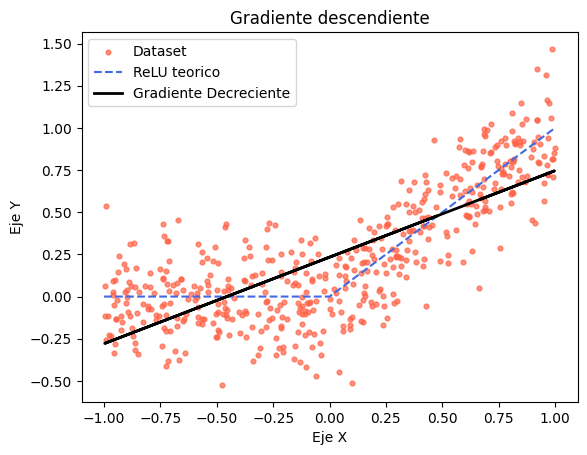

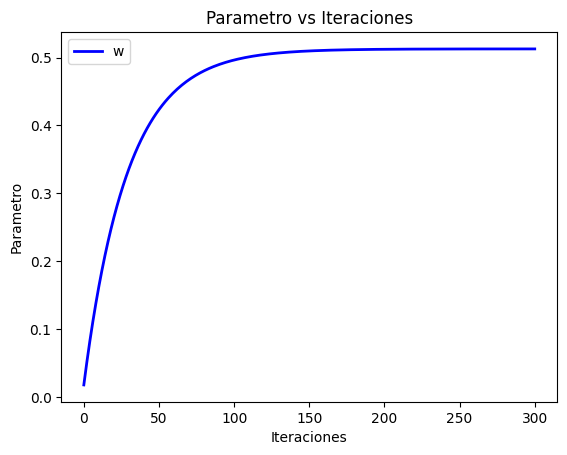

In [20]:
class GradienteDescendiente:
    def _init_(self):
        self.params = None

    # Etapa de entrenamiento
    def fit_gradient(self, X, y, learning_rate, max_iter=300):
        X_1 = np.c_[np.ones((X.shape[0], 1)), X]   # agrego columna de unos
        n_samples, n_variables = X_1.shape

        b = np.zeros([max_iter,1])
        w = np.zeros([max_iter,1])

        y = y.reshape(-1, 1)

        # inicializo parametros en un tamaño de self params [v_variables, 1]
        self.params = np.zeros((n_variables, 1))

        for i in range(max_iter):
            # hago una prediccion
            y_pred = X_1 @ self.params

            # calculo el gradiente
            gradiente = (2 / n_samples) * X_1.T @ (y_pred - y)

            # guardo parámetros anteriores
            params_prev = self.params.copy()

            # guardo el parámetro a la siguiente iteracino
            self.params -= learning_rate * gradiente

            # Guardo
            b[i] = self.params[0]
            w[i] = self.params[1]

        return b, w


    # Etapa de testeo
    def predict_gradient(self, X):
        X_1 = np.c_[np.ones((X.shape[0], 1)), X]
        #ya con los parametros calculo y listo
        return X_1 @ self.params

    # Cómputo del error
    def err_predict_gradient(self, X, y):
        y = y.reshape(-1, 1)
        y_pred = self.predict_gradient(X)
        return np.mean((y - y_pred)**2)


#
reg = GradienteDescendiente()
b_ant, w_ant = reg.fit_gradient(x, y_dado_x, 0.05)

print("Parámetros (b, w):", reg.params.ravel())

# error de entrenamiento
error = reg.err_predict_gradient(x, y_dado_x)
print("Error de entrenamiento (MSE):", error)

# potencia para irradiancia = 0.5
irradiancia = np.array([[0.5]])
prediccion = reg.predict_gradient(irradiancia)
print("Predicción para irradiancia 0.5:", prediccion[0])

N= np.linspace(0,len(b_ant),len(b_ant))

y_pred = reg.predict_gradient(x)

plt.scatter(x, y_dado_x, s=12, alpha=0.7, color='Tomato', label='Dataset')
plt.plot(r_x_plot, np.maximum(0, r_x_plot), color = 'royalblue', label = "ReLU teorico", linestyle='--')
plt.plot(x, y_pred, color='black', linewidth=2, label='Gradiente Decreciente')
plt.xlabel("Eje X")
plt.ylabel("Eje Y")
plt.title("Gradiente descendiente")
plt.legend()
plt.show()

#plt.plot(N, b_ant, color="red", linewidth=2, label="b")
plt.plot(N, w_ant, color="blue", linewidth=2, label="w") #se estabiliza en 0.5 que tiene sentido
plt.xlabel("Iteraciones")
plt.ylabel("Parametro")
plt.title("Parametro vs Iteraciones")
plt.legend()
plt.show()

## Primer Ejercicio

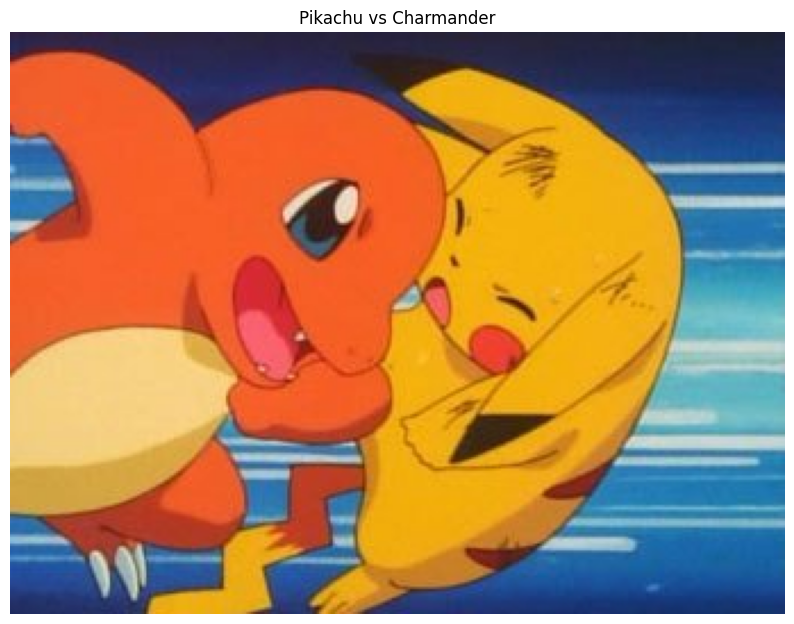

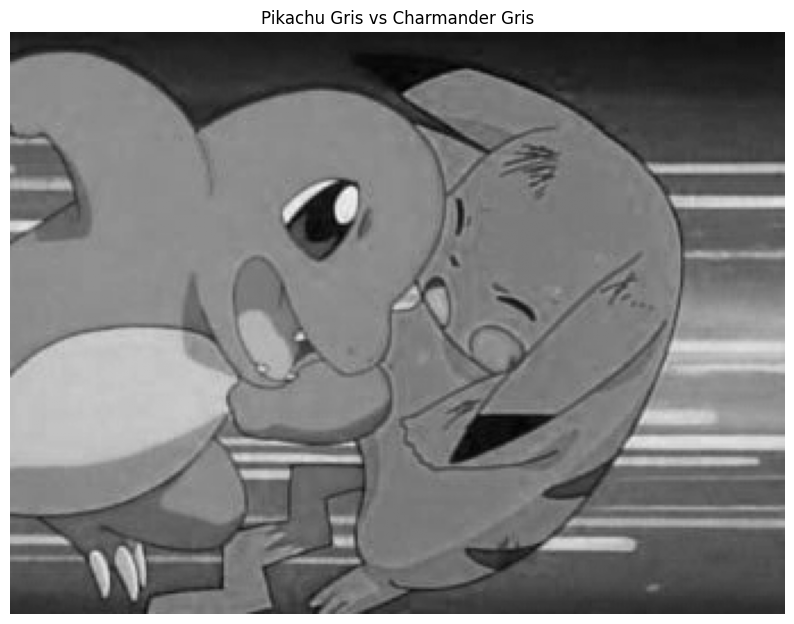

In [ ]:
#clase 1, guia 1 ejs 1,2,3

#1.1 sin utilizar loops convertir a escala de grises la imagen pikachu_vs_charmander.jpeg implementando las siguientes tecnicas
#help utilie las funciones imread e imshow
# a) (min(R,G,B) + max(R,G,B))/2

pika = plt.imread('pikachu_vs_charmander.jpeg')

plt.figure(figsize=(10, 10))
plt.imshow(pika)
plt.title('Pikachu vs Charmander')
plt.axis('off')
plt.show()

#queremos que el max y minimo tengan mismo .shape que la imagen! asi tengo un valor por pixel y puedo formar la imagen
maximo = np.max(pika, axis=2).astype(int)
minimo = np.min(pika, axis=2).astype(int)
pikaGris = (maximo + minimo) /2

plt.figure(figsize=(10, 10))
plt.imshow(pikaGris, cmap = 'gray')
plt.title('Pikachu Gris vs Charmander Gris')
plt.axis('off')
plt.show()


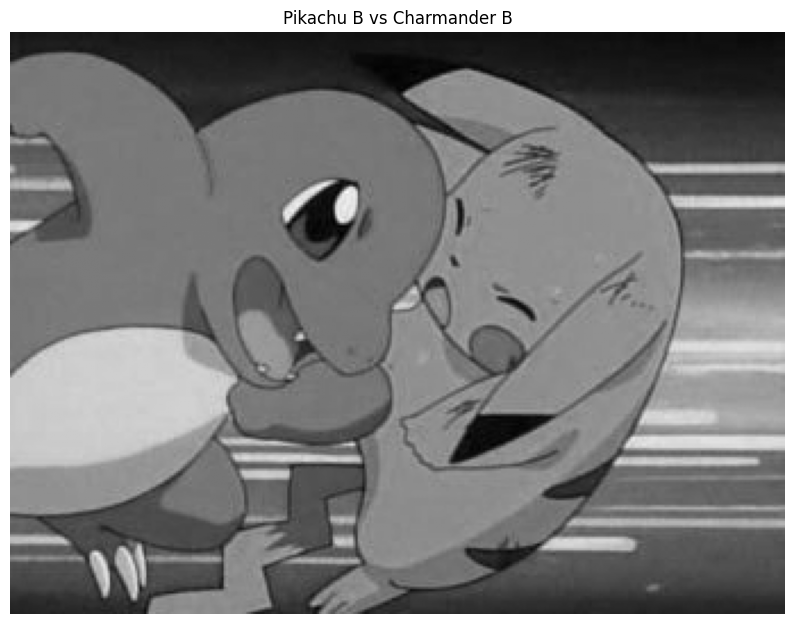

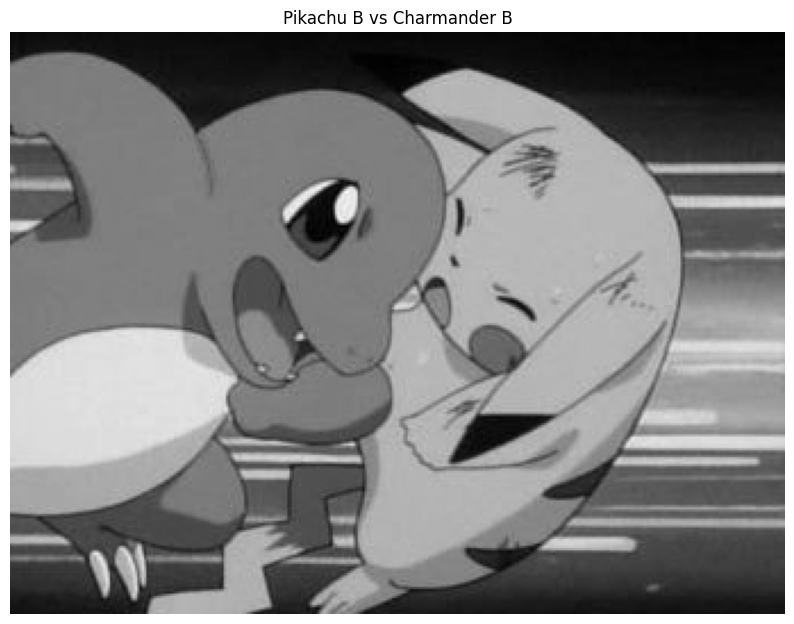

In [ ]:
# b) (R+G+B)/3

#quiero tres matrices de la misma dimension de la imagen, donde obtengo las
R = pika[:,:,0].astype(int)
G = pika[:,:,1].astype(int)
B = pika[:,:,2].astype(int)

pikaB = (R+G+B)/3

plt.figure(figsize=(10, 10))
plt.imshow(pikaB, cmap = 'gray')
plt.title('Pikachu B vs Charmander B')
plt.axis('off')
plt.show()

# c) 0.3R + 0.59G + 0.11B (utilice el comando @)
pesos = np.array([0.3, 0.59, 0.11])
pikaC = pika @ pesos

plt.figure(figsize=(10, 10))
plt.imshow(pikaC, cmap = 'gray')
plt.title('Pikachu C vs Charmander C')
plt.axis('off')
plt.show()

## Segundo ejercicio

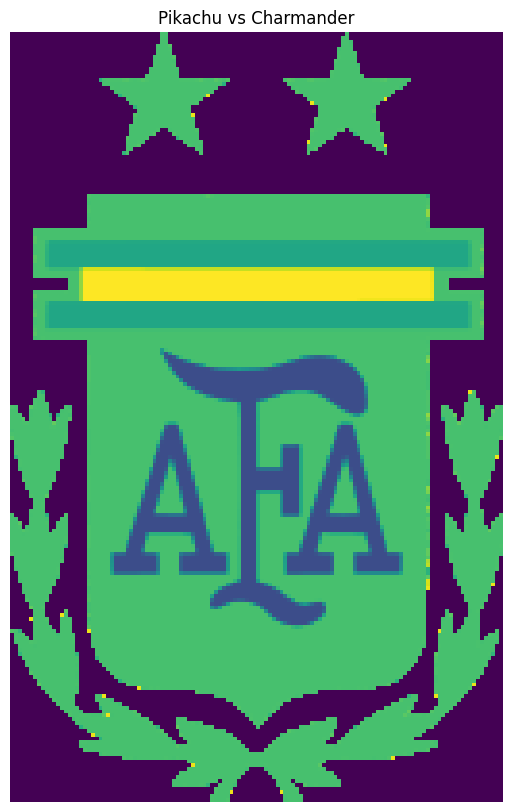

In [ ]:
#1.2 sin utilizar loops, utilizando indexación edite la imagen AFALogo.bpm para

#a) cortar las letras dentro del logo
afa = plt.imread('AFALogo.bmp')

plt.figure(figsize=(10, 10))
plt.imshow(afa)
plt.title('AFA')
plt.axis('off')
plt.show()


#b) cortar las estrellas y transponerlas
#c) generar una mascara separando el color de fondo del logotipo
# ....